In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="darkgrid")
import scipy as sp
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from datetime import datetime

In [51]:
exec(open("../../header.py").read())

In [52]:
# read in data and replace nans
data = pd.read_csv(raw_root('risk_factors_cervical_cancer.csv')).\
    replace('?', np.nan)

In [53]:
# impute, default is mean
my_imputer = SimpleImputer()
data_final = pd.DataFrame(my_imputer.fit_transform(data))
data_final.columns= data.columns


In [54]:
# all the target variables, i only use Biopsy
targets = ['Hinselmann', 'Schiller','Citology','Biopsy']

In [55]:
# split data
X = data_final.loc[:, ~data_final.columns.isin(targets)]
y = data_final['Biopsy']

In [57]:
# fit RF
rf = RandomForestClassifier(n_estimators = 500)
rf.fit(X, y)

RandomForestClassifier(n_estimators=500)

In [58]:
X.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx
0,18.0,4.0,15.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.140845,5.816901,0.0,0.0,0.0,0.0
1,15.0,1.0,14.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.140845,5.816901,0.0,0.0,0.0,0.0
2,34.0,1.0,16.9953,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.140845,5.816901,0.0,0.0,0.0,0.0
3,52.0,5.0,16.0000,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0.0,0.0,0.0,6.140845,5.816901,1.0,0.0,1.0,0.0
4,46.0,3.0,21.0000,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0.0,0.0,0.0,6.140845,5.816901,0.0,0.0,0.0,0.0


In [59]:
print(f"Out of {len(y)} y-values, there are {np.sum(y == 1)} 1s and {np.sum(y == 0)} 0s")

Out of 858 y-values, there are 55 1s and 803 0s


In [63]:
def uniform_sample(df, feature, frac_to_plot, seednum = None, trace = False):
  '''
  #' Uniformly sample across quantiles of x_j
  #' to ensure not to leave out portions of the
  #' dist'n of x.
  #' @param df : Covariate matrix.
  #' @param feature : Target covariate bin.
  #' @param frac_to_plot : Fraction of data set to plot.
  #' @param seed_num : Random seed for reproducibility.
  #' @return Uniformly sampled dataframe with N * frac_to_plot observations.
  #' @examples
  #' uniform_sample(X, 'Age', .33, 420)
  '''
  df = df.copy()

  # get number of rows to sample
  N = df.shape[0] * frac_to_plot
  if trace:
        print(f"Sampling {N} observations")

  # get amount for each quantile (sometimes uneven)
  quantile = [N // 4 + (1 if x < N % 4 else 0)  for x in range (4)]
  if trace:
        print(f"quantile {quantile}")

  # create labels and bins for quantiles
  bins, labels = [0, .25, .5, .75, 1.], ['q1', 'q2', 'q3', 'q4'],

  # create col to get quantiles of x_j to not leave out portions of the dist'n of x
  df['quantile'] = pd.qcut(df[feature], q = bins, labels = labels)
  if trace:
        print(df['quantile'][:3])

  # uniformly sample quantiles
  out = pd.concat([df[df['quantile'].eq(label)].sample(int(quantile[i])) 
                   for i, label in enumerate(labels)]).\
      drop(columns = ['quantile'])
  
  return out

In [64]:
uniform_sample(X, 'Age', 0.01, trace = True)

Sampling 8.58 observations
quantile [3.0, 2.0, 2.0, 2.0]
0    q1
1    q1
2    q4
Name: quantile, dtype: category
Categories (4, object): ['q1' < 'q2' < 'q3' < 'q4']


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx
776,17.0,1.0,16.0,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,6.140845,5.816901,0.0,0.0,0.0,0.0
554,15.0,4.0,12.0,1.000000,0.0,0.0,0.0,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,6.140845,5.816901,0.0,0.0,0.0,0.0
697,18.0,2.0,15.0,2.275561,0.0,0.0,0.0,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,6.140845,5.816901,0.0,0.0,0.0,0.0
627,23.0,1.0,15.0,3.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,6.140845,5.816901,0.0,0.0,0.0,0.0
321,22.0,2.0,19.0,1.000000,0.0,0.0,0.0,0.641333,2.256419,0.112011,...,0.023904,0.001328,0.002656,0.0,6.140845,5.816901,0.0,0.0,0.0,0.0
603,26.0,4.0,16.0,3.000000,0.0,0.0,0.0,0.641333,2.256419,0.112011,...,0.023904,0.001328,0.002656,0.0,6.140845,5.816901,0.0,0.0,0.0,0.0
514,27.0,5.0,21.0,1.000000,0.0,0.0,0.0,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,6.140845,5.816901,0.0,0.0,0.0,0.0
818,35.0,4.0,18.0,2.275561,0.0,0.0,0.0,1.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,6.140845,5.816901,0.0,0.0,0.0,0.0
777,37.0,4.0,26.0,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,6.140845,5.816901,0.0,0.0,0.0,0.0


In [113]:
def ice_plot(plot_data, feature, plot_num = 100, y_var = "Predicted Probability"):

  '''
  #' Generates ICE data
  #' @param plot_data : ICE data to plot
  #' @param feature : Target covariate to plot.
  #' @return ICE plot
  #' @examples
  #' ice_plot(X, 'Age')
  '''

  ob_sample = np.random.choice(plot_data.Obs.unique(), size = plot_num, replace = False)
    
  mean_line = plot_data\
    .groupby(feature)\
    .agg(y = (y_var, 'mean'))\
    .reset_index()\
    .rename({'y':y_var}, axis = 1)\
    .assign(Obs = -1,
            mean_line = 1)

  plot_sub_data = plot_data\
    .loc[lambda x:x.Obs.isin(ob_sample)]\
    .assign(mean_line = 0)\
    .append(mean_line, ignore_index = True)

  # set fig size
  plt.figure(figsize=(12,10)) 

  # set lines to all black
  palette = sns.color_palette(['black'], plot_num + 1)

  # plot ICE
  sns.lineplot(data=plot_sub_data, x= feature, y=y_var, hue='Obs', palette=palette, legend=False)
  plt.title('{} ICE Plot'.format(feature), fontsize=18)
  plt.xlabel(feature, fontsize=18)
  plt.ylabel('Predicted Probability', fontsize=16)
  plt.show()

In [211]:
def ice_plot2(plot_data, feature, plot_num = 100, y_var = "Predicted Probability"):

  '''
  #' Generates ICE data
  #' @param plot_data : ICE data to plot
  #' @param feature : Target covariate to plot.
  #' @return ICE plot
  #' @examples
  #' ice_plot(X, 'Age')
  '''

  ob_sample = np.random.choice(plot_data.obs.unique(), 
                               size = plot_num, replace = False)
    
  ob_sample = np.append(ob_sample, [-1])
    
  mean_line = plot_data\
    .groupby(feature)\
    .agg(y = (y_var, 'mean'))\
    .reset_index()\
    .rename({'y':y_var}, axis = 1)\
    .assign(obs = -1,
            mean_line = 1)

  plot_sub_data = plot_data\
    .loc[lambda x:x.obs.isin(ob_sample)]\
    .assign(mean_line = 0)\
    .append(mean_line, ignore_index = True)

  # set fig size
  fig, ax = plt.subplots()
  
  # plot ICE
  for ob in ob_sample:
    d = plot_sub_data.loc[lambda x:x.obs == ob]
    if max(d.mean_line) == 0:
        alpha = 0.1
        color = "black"
        label = ""
    elif max(d.mean_line) == 1:
        alpha = 5
        color = "red"
        label = "Mean line"
        print("Plot mean line")
    ax.plot(feature, y_var, label = label, alpha = alpha, data = d, color = color)
  ax.set_title('{} ICE Plot'.format(feature), fontsize=18)
  ax.set_xlabel(feature, fontsize=18)
  ax.set_ylabel('Predicted Probability', fontsize=16)
  ax.legend()
  
  return (fig, ax)

In [213]:
def ice2(X, clf, feature, model_type, num_per_ob = 30, frac_to_plot = 1, seednum = None):

  '''
  #' Generates ICE data
  #' @param X : Covariate matrix.
  #' @param clf : ML classifier.
  #' @param feature : Target covariate to plot.
  #' @param frac_to_plot : Fraction of data set to plot.
  #' @param seed_num : Random seed for reproducibility.
  #' @return ICE data (dataframe) with N observations.
  #' @examples
  #' ice_plot(X, rf, 'Age', frac_to_plot = .33 , seednum = 420)
  '''

  # uniformly sample
  X = uniform_sample(X, feature, frac_to_plot, seednum)

  feature_min = np.min(X[feature])
  feature_max = np.max(X[feature])
  feature_range = np.linspace(feature_min, feature_max, num = num_per_ob)
    
  df = pd.DataFrame()

  start = datetime.now()
  for i in X.index:
  
    # make temp df for each instance
    temp_df = X.loc[np.repeat(i, num_per_ob)].copy().reset_index(drop = True)
    temp_df[feature] = feature_range
    
    # get predictions
    if model_type == "binary":    
      preds = clf.predict_proba(temp_df)[:,1]
    else:
      preds = clf.predict(temp_df)
    temp_df['y_pred'] = preds
    temp_df['obs'] = i
    
    df = df\
        .append(temp_df, ignore_index = True)
    
    
  end = datetime.now()
  print(f"Time to create dataframe: {end - start}")

  return ice_plot2(df, feature, plot_num = 300, y_var = "y_pred")

0:00:15.362776
Plot mean line


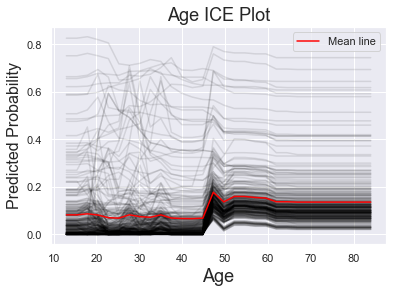

In [214]:
seednum = 420
a = ice2(X = X, clf = rf, feature = 'Age', model_type = 'binary', frac_to_plot = .50, seednum = seednum)